In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as pl
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
latlon = pd.read_csv('latlon.csv')
latlon = latlon.set_index('City')

In [3]:
# Yichun伊春 Yichun2宜春 Suzhou苏州 Suzhou2宿州 Jining济宁 Jining2集宁 Jinzhou锦州 Jinzhou2金州 Taizhou泰州 Taizhou2台州
latlon.head()

,Unnamed: 0,Pop (2000),lat,lon
City,,,,
Shanghai,1,13278500,31.23,121.47
Beijing,2,7209900,39.93,116.40
Wuhan,3,4104300,30.58,114.27
Chengdu,4,4064700,30.67,104.07
Tianjin,5,3945900,39.13,117.20


In [4]:
latlon2 = {}
for i in latlon.index:
    latlon2[i] = (latlon['lon'][i],latlon['lat'][i])

In [5]:
latlon2['Shishi']

(118.42, 24.43)

In [8]:
Gcity = nx.MultiGraph()
for i in latlon.index:
    Gcity.add_node(i)

In [11]:
label = {}
for i in Gcity.nodes():
    label[i] = i

/Users/yutao/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


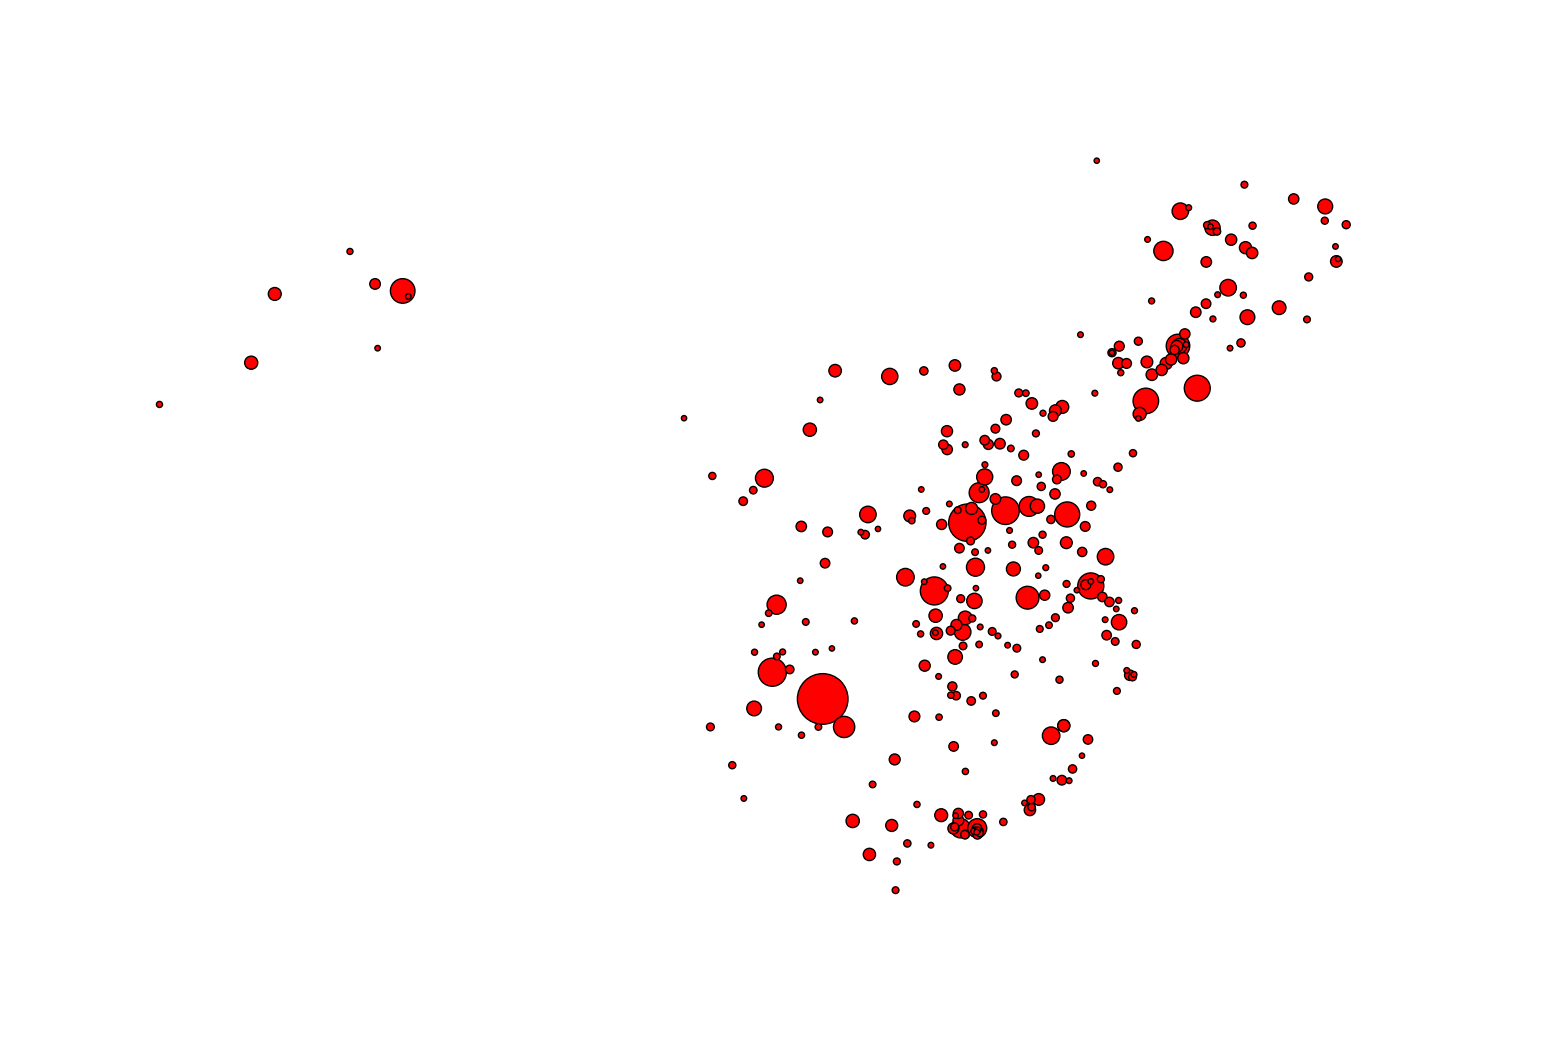

In [12]:
plt.figure(figsize = (15,10))    
nx.draw(Gcity,pos=latlon2,labels=label,font_size=200,node_size=latlon['Pop (2000)']/10000)

In [13]:
citylist = latlon.index

In [14]:
dic ={}
nan = 0
    #秦沈
dic[0] = {'Qinhuangdao':0, 'Huludao':138, 'Jinzhou':181, 'Panjin':250, 'Anshan':305, 'Shenyang':404}
    #合宁
dic[1] = {'Hefei':0, 'Chuzhou':101, 'Nanjing':156.4}
    #胶济
dic[2] = {'Jinan':0, 'Zibo':104.5, 'Weifang':200.3, 'Qingdao':361.7}
    #合武(缺数据)
dic[3] = {'Hefei':0, 'Luan':1, 'Macheng':2, 'Wuhan':359.361}
    #石太
dic[4] = {'Taiyuan':0, 'Yangquan':94.8, 'Shijiazhuang':197.9}
    #温福
dic[5] = {'Wenzhou':0, 'Ningde':206, 'Fuzhou':298}
    #遂成(没看懂）
dic[6] = {'Suining':0, 'Chengdu':146}
    #甬台
dic[7] = {'Ningbo':0, 'Taizhou2':152.14, 'Wenzhou':279.09}
    #武广
dic[8] = {'Wuhan':1189, 'Xianning':1275, 'Yueyang':1403, 'Changsha':1572, 'Zhuzhou':1613, 'Hengyang':1722, 'Chenzhou':1855, 'Shaoguan':1988, 'Qingyuan':2105, 'Guangzhou':2218}
    #郑西(缺数据)
dic[9] = {'Zhengzhou':0, 'Luoyang':1, 'Sanmenxia':2, 'Weinan':3, 'Xian':455}
    #福厦
dic[10] = {'Fuzhou':0, 'Xiamen':274.9}
    #沪宁
dic[11] = {'Shanghai':0, 'Suzhou':84, 'Wuxi':126, 'Changzhou':165, 'Zhenjiang':237, 'Nanjing':301}
    #沪杭
dic[12] = {'Shanghai':0, 'Jiaxing':84, 'Hangzhou':169}
    #宜万(看不懂）
dic[13] = {'Yichang':0, 'Chongqing':376.99}
    #京沪    Suzhou2=宿州
dic[14] = {'Beijing':0, 'Langfang':59, 'Tianjin':131, 'Cangzhou':219, 'Jinan':419, 'Taian':462, 'Jining':533, 'Zaozhuang':625, 'Xuzhou':688, 'Suzhou2':767, 'Bengbu':844, 'Chuzhou':959, 'Nanjing':1018, 'Zhenjiang':1087, 'Changzhou':1144, 'Wuxi':1201, 'Suzhou':1227, 'Shanghai':1302}
#城际铁路
    #京津
dic[15] = {'Beijing':0, 'Tianjin':120}
    #沈抚(少数据）
dic[16] = {'Shenyang':0, 'Fushun':61}
    #成灌城际铁路(少数据）
dic[17] = {'Chengdu':0, 'Dujiangyan':67}
    #昌九(少数据）
dic[18] = {'Nanchang':0, 'Jiujiang':131}
    #长吉城际
dic[19] = {'Changchun':0, 'Jilin':110.7}
    #海南
dic[20] = {'Haikou':0, 'Sanya':302}
    #广珠 (中山到江门支线)
dic[21] = {'Guangzhou':0, 'Foshan':15, 'Zhongshan':70, 'Zhuhai':116, 'Jiangmen':72,}
    #柳南
dic[22] = {'Liuzhou':0, 'Nanning':226}
    #武咸城际铁路
dic[23] = {'Wuhan':0, 'Xianning':91}
  #汉宜(缺数据)
dic[24] = {'Wuhan':0, 'Hanchuan':1, 'Tianmen':2, 'Xiantao':3, 'Qianjiang':4, 'Jingzhou':5,'Zhijiang':6,'Yichang':7}
    #石武(缺数据)
dic[25] = {'Shijiazhuang':0, 'Xingtai':1, 'Handan':2,'Anyang':3,'Hebi':4,'Xinxiang':5,'Zhengzhou':6,'Xuchang':7,'Luohe':8,'Zhumadian':9,'Xinyang':10,'Wuhan':483}
    #哈大(缺数据)
dic[26] = {'Harbin':0,'Changchun':1,'Siping':2,'Tieling':3,'Shenyang':4,'Liaoyang':5,'Anshan':6,'Yingkou':7,'Dalian':904}
    #京石(缺数据)
dic[27] = {'Beijing':0,'Baoding':1,'Dingzhou':2,'Shijiazhuang':281}
    #渝遂
dic[28] = {'Suining':0,'Chongqing':167}
    #宁杭
dic[29] = {'Nanjing':0,'Zhenjiang':26,'Changzhou':98,'Wuxi':129,'Huzhou':185,'Hangzhou':256}
    #杭甬
dic[30] = {'Hangzhou':0,'Shaoxing':42,'Ningbo':150}
    #盘营(缺数据)
dic[31] = {'Panjin':0, 'Yingkou':90}
    #津秦
dic[32] = {'Tianjin':16,'Tangshan':130,'Qinhuangdao':277}
    #西宝(缺数据)
dic[33] = {'Xian':0,'Xianyang':1,'Baoji':148}
    #渝利
dic[34] = {'Lichuan':0,'Chongqing':278}
    #厦深(缺数据)
dic[35] = {'Xiamen':0,'Zhangzhou':1,'Chaozhou':2,'Shantou':3,'Jieyang':4,'Shanwei':5,'Huizhou':6,'Shenzhen':502}
    #杭长
dic[36] = {'Hangzhou':0,'Shaoxing':66,'Jinhua':161,'Quzhou':269,'Shangrao':341,'Yingtan':442,'Fuzhou2':485,'Nanchang':582,'Xinyu':709,'Yichun2':758,'Pingxiang':819,'Zhuzhou':848,'Changsha':924}
    #长昆(缺数据)
dic[37] = {'Changsha':1083,'Xiangtan':1109,'Loudi':1208,'Shaoyang':1260,'Huaihua':1415,'Tongren':1522,'Qiandongnan':1570,'Qiannan':1571,'Guiyang':1572}

dic[38] = {}
#杭长（杭州东站至南昌西站段）
dic[39] = {}
#衡柳
dic[40] = {'Hengyang':0, 'Yongzhou':1, 'Guilin':2, 'Liuzhou':3}
#广深
dic[41] = {'Guangzhou':0, 'Dongguan':1, 'Shenzhen':2}

#dic[54] = {'Pixian':0,'Pengzhou':21.2}
    #武黄
dic[42] = {'Wuhan':0,'Ezhou':56,'Huangshi':85}
    #成绵乐
#dic[43] = {'Mianyang':0,'Deyang':nan,'Chengdu':nan,'Meishan':nan,'Leshan':319}
    #青荣
dic[44] = {'Qingdao':1,'Yantai':187,'Weihai':261}
    #郑开
dic[45] = {'Zhengzhou':0,'Kaifeng':50}
    #贵开
#dic[46] = {'Guiyang':0, 'Kaiyang':62}
    #郑焦
dic[47] = {'Zhengzhou':0,'Jiaozuo':77.8}
    #哈齐
dic[48] = {'Harbin':0,'Suihua':nan,'Daqing':nan,'Qiqihar':281.5}
    #沈丹
dic[49] = {'Shenyang':1,'Benxi':62,'Dandong':208}
    #津滨
dic[50] = {}
    #吉珲
dic[51] = {'Jilin':0,'Yanbian':359}
    #兰中
dic[52] = {}
    #宁安
dic[53] = {'Nanjing':0,'Maanshan':42,'Wuhu':85,'Tongling':161,'Chizhou':211,'Anqing':251}

In [15]:
import operator

In [16]:
popu = []
for i in Gcity.nodes():
    popu.append(latlon['Pop (2000)'][i]/10000)

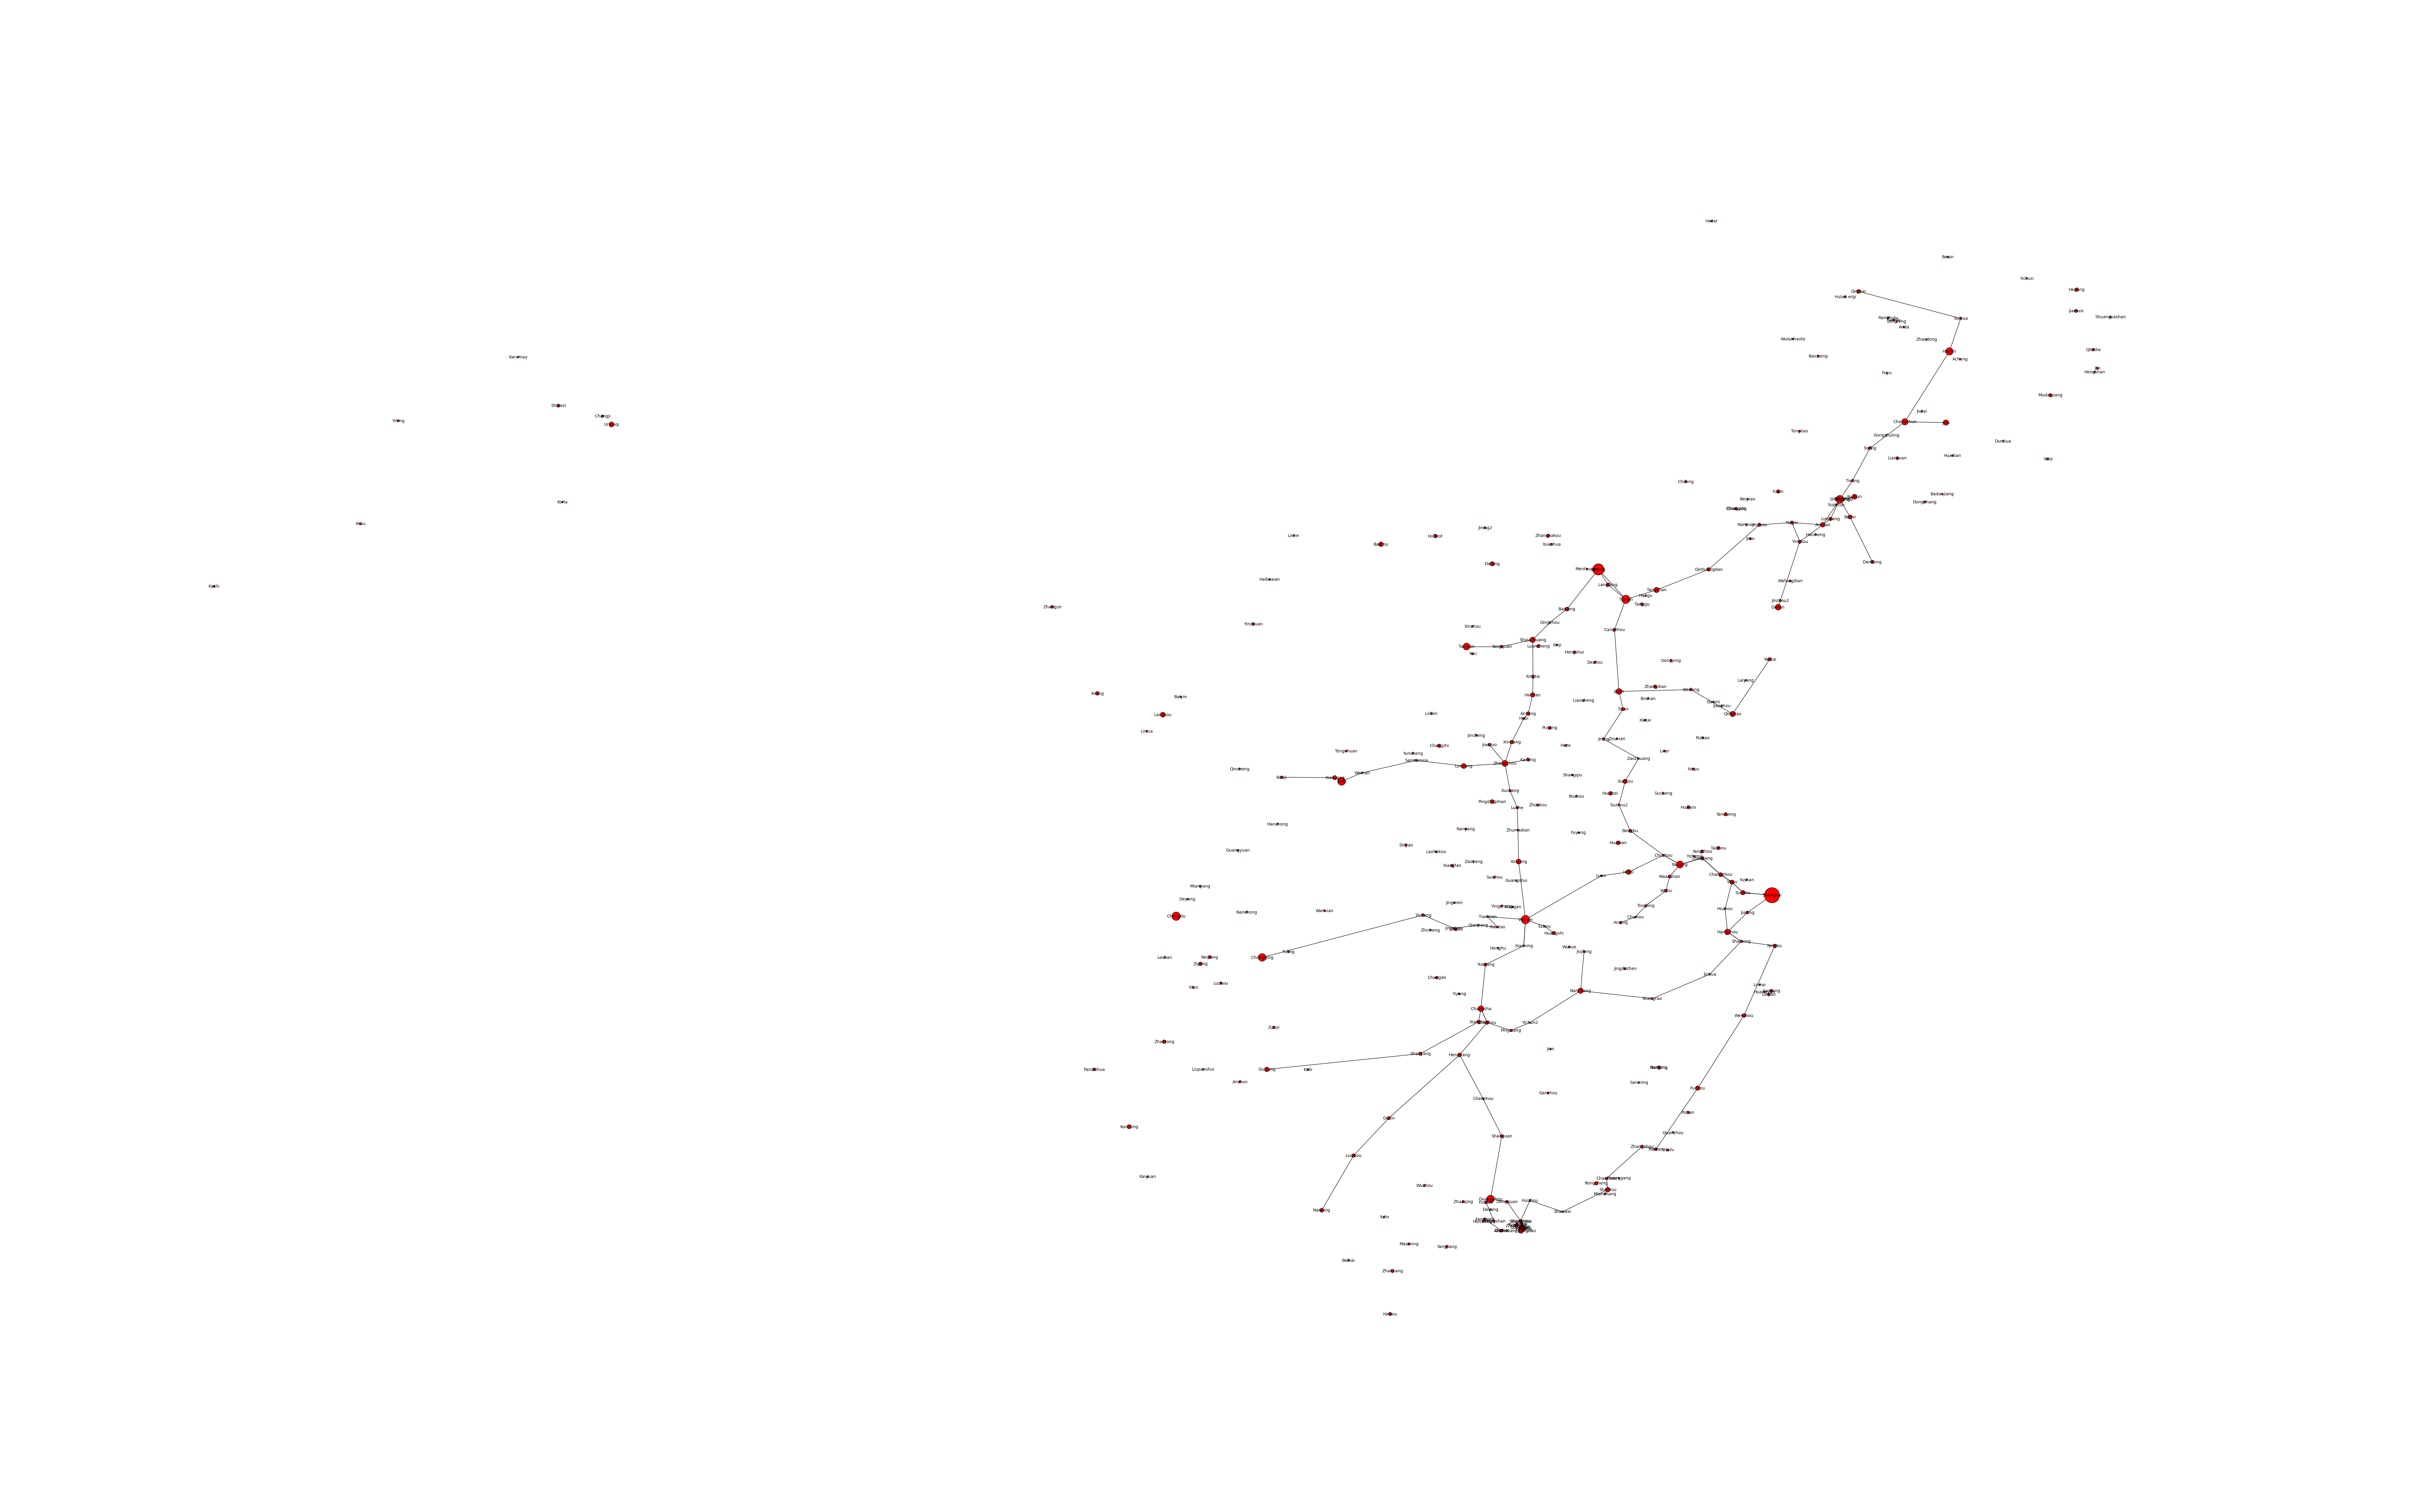

In [17]:
Gcity = nx.MultiGraph()
for i in latlon.index:
    Gcity.add_node(i)


for r in dic:
    xx = sorted(dic[r].items(), key=operator.itemgetter(1))
    xxx = []
    for i in range(len(xx)):
        if xx[i][0] in citylist:
            xxx.append(xx[i])
    for i in range(len(xxx)-1):
        if (xxx[i][0] in citylist) & (xxx[i+1][0] in citylist):
            Gcity.add_edge(xxx[i][0],xxx[i+1][0])
            
            
plt.figure(figsize = (80,50))    
nx.draw(Gcity,pos=latlon2,with_labels=1,font_size=10,node_size=popu)

# Centrality

In [18]:
#output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)
    for i in range(0,tn):
       print('{0}|{1}:{2}'.format(i+1,ind[i],d[ind[i]]))

In [19]:
c1= nx.degree(Gcity)
topdict(c1,10)

1|Changzhou:6
2|Wuxi:6
3|Zhenjiang:6
4|Nanjing:6
5|Wuhan:6
6|Zhengzhou:5
7|Shenyang:5
8|Anshan:4
9|Chuzhou:4
10|Hangzhou:4


In [20]:
GcityS = nx.Graph(Gcity)

In [21]:
FCGS=list(nx.connected_component_subgraphs(GcityS, copy=True))

In [22]:
c2= nx.eigenvector_centrality(FCGS[1],1000)
topdict(c2,10)

1|Anshan:0.5173778223
2|Shenyang:0.486012575899
3|Liaoyang:0.345011850712
4|Panjin:0.339509888821
5|Yingkou:0.334143628559
6|Tieling:0.19443638896
7|Benxi:0.189520459788
8|Fushun:0.167113465032
9|Jinzhou:0.135866141121
10|Dalian:0.114894067872


In [23]:
FCG=list(nx.connected_component_subgraphs(Gcity, copy=True))

In [25]:
FCG[1].nodes()[:5]

['Zhengzhou', 'Handan', 'Hebi', 'Zhongshan', 'Shenzhen']

In [26]:
c3 = nx.current_flow_betweenness_centrality(FCG[1])
topdict(c3,10)

1|Wuhan:0.481390708348
2|Chuzhou:0.431844003844
3|Tianjin:0.413121370276
4|Nanjing:0.343651440149
5|Zhengzhou:0.3337151077
6|Zhuzhou:0.319255018982
7|Jinan:0.314952361324
8|Bengbu:0.308495693222
9|Changsha:0.30359102354
10|Suzhou2:0.302852739553


In [27]:
c4 = nx.closeness_centrality(FCG[1])
topdict(c4,10)

1|Wuhan:0.106363636364
2|Chuzhou:0.106267029973
3|Luan:0.105882352941
4|Hefei:0.105786618445
5|Bengbu:0.102451838879
6|Xianning:0.102094240838
7|Nanjing:0.100429184549
8|Xinyang:0.0999146029035
9|Suzhou2:0.0989010989011
10|Yueyang:0.0983193277311


In [28]:
c5 = nx.pagerank(GcityS,0.85)
topdict(c5,10)

1|Zhengzhou:0.0156473433472
2|Wuhan:0.0145275757705
3|Shenyang:0.0141931912356
4|Tianjin:0.0109074906199
5|Anshan:0.0106482553107
6|Changchun:0.0103014762557
7|Nanchang:0.00978608139658
8|Shijiazhuang:0.00963984179726
9|Guangzhou:0.00942299110791
10|Jinan:0.00923704817933


In [29]:
df1 = pd.DataFrame.from_dict(c1, orient='index')
df2 = pd.DataFrame.from_dict(c2, orient='index')
df3 = pd.DataFrame.from_dict(c3, orient='index')
df4 = pd.DataFrame.from_dict(c4, orient='index')
df5 = pd.DataFrame.from_dict(c5, orient='index')
df1 = df1.rename(columns = {0:'degree'})
df2 = df2.rename(columns = {0:'eigenvalue'})
df3 = df3.rename(columns = {0:'between'})
df4 = df4.rename(columns = {0:'closeness'})
df5 = df5.rename(columns = {0:'pagerank'})

In [41]:
pop2010 = pd.read_csv('2010_census_population.csv')

pop2010 = pop2010.set_index('City')

latlon['pop (2010)'] = NaN

In [42]:
for i in latlon.index:
    if i in pop2010.index:
        latlon['pop (2010)'][i] = pop2010['Administrative area'][i]

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/yutao/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
latlon['pop (2010)']['Jilin'] = '4414681'
latlon['pop (2010)']['Urumqi'] = '3112559'
latlon['pop (2010)']['Hengyang'] = '7141462'
latlon['pop (2010)']['Yingkou'] = '2428534'

latlon = latlon.dropna()

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/yutao/anaconda/lib/python2.7

In [51]:
def to_num(x):
    try:
        return int(x.replace(',',''))
    except:
        return float('NaN')

In [64]:
df = pd.concat([df1,df2,df3,df4,df5],axis=1)
df['Pop2010'] = latlon['pop (2010)'].apply(to_num)

In [65]:
dfclean = df.dropna()

In [66]:
dfclean.head()

,degree,eigenvalue,between,closeness,pagerank,Pop2010
Anqing,1,1.666205e-07,0.000000,0.067826,0.004376,5311000.0
Anshan,4,5.173778e-01,0.196336,0.063312,0.010648,3645884.0
Anyang,2,6.225809e-05,0.243423,0.081933,0.006713,5172834.0
Baoding,2,4.904218e-03,0.249308,0.076321,0.006115,11194379.0
Baoji,1,1.376549e-07,0.000000,0.059361,0.004410,3716731.0


In [67]:
dfclean = dfclean.astype(float)

                            OLS Regression Results                            
Dep. Variable:               pagerank   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.927
Date:                Sun, 19 Mar 2017   Prob (F-statistic):             0.0905
Time:                        18:43:29   Log-Likelihood:                 448.23
No. Observations:                  95   AIC:                            -892.5
Df Residuals:                      93   BIC:                            -887.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0064      0.000     15.660      0.0

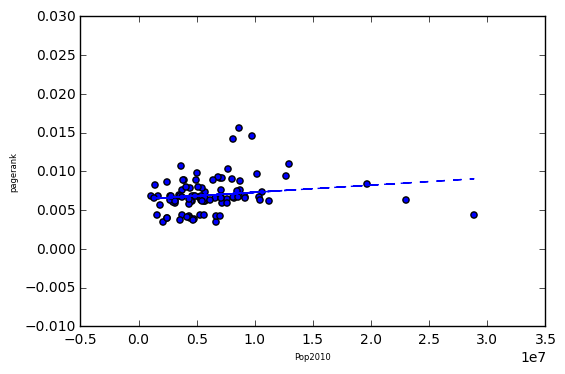

In [68]:
model1 = smf.ols(formula = 'pagerank ~ Pop2010', data=dfclean).fit()
print model1.summary()

pl.scatter(dfclean.Pop2010, dfclean.pagerank)
pl.xlabel('Pop2010', fontsize=6)
pl.ylabel('pagerank', fontsize=6)
plot(dfclean.Pop2010, model1.predict(), '--')

                            OLS Regression Results                            
Dep. Variable:              closeness   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.05028
Date:                Sun, 19 Mar 2017   Prob (F-statistic):              0.823
Time:                        18:43:07   Log-Likelihood:                 266.19
No. Observations:                  95   AIC:                            -528.4
Df Residuals:                      93   BIC:                            -523.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0758      0.003     27.456      0.0

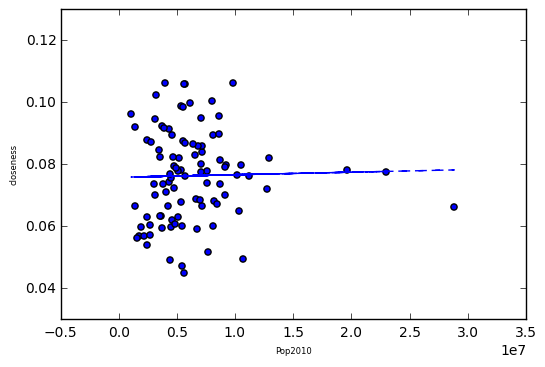

In [58]:
model1 = smf.ols(formula = 'closeness ~ Pop2010', data=dfclean).fit()
print model1.summary()

pl.scatter(dfclean.Pop2010, dfclean.closeness)
pl.xlabel('Pop2010', fontsize=6)
pl.ylabel('closeness', fontsize=6)
plot(dfclean.Pop2010, model1.predict(), '--')

                            OLS Regression Results                            
Dep. Variable:                between   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.845
Date:                Sun, 19 Mar 2017   Prob (F-statistic):              0.178
Time:                        18:43:07   Log-Likelihood:                 63.089
No. Observations:                  95   AIC:                            -122.2
Df Residuals:                      93   BIC:                            -117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1211      0.023      5.171      0.0

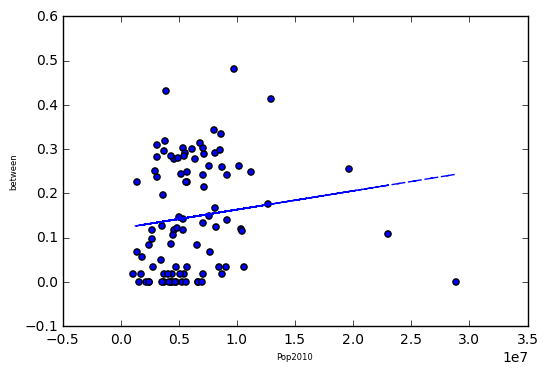

In [59]:
model1 = smf.ols(formula = 'between ~ Pop2010', data=dfclean).fit()
print model1.summary()

pl.scatter(dfclean.Pop2010, dfclean.between)
pl.xlabel('Pop2010', fontsize=6)
pl.ylabel('between', fontsize=6)
plot(dfclean.Pop2010, model1.predict(), '--')

                            OLS Regression Results                            
Dep. Variable:             eigenvalue   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.781
Date:                Sun, 19 Mar 2017   Prob (F-statistic):             0.0549
Time:                        18:43:08   Log-Likelihood:                 88.834
No. Observations:                  95   AIC:                            -173.7
Df Residuals:                      93   BIC:                            -168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0617      0.018      3.454      0.0

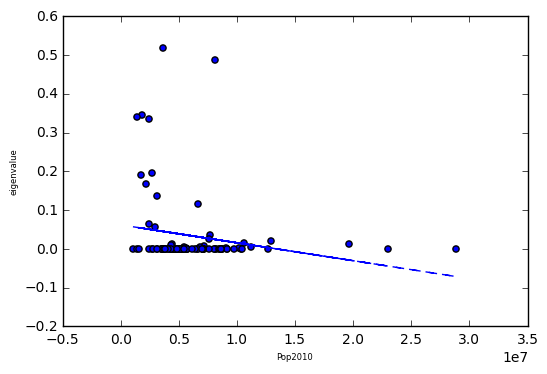

In [60]:
model1 = smf.ols(formula = 'eigenvalue ~ Pop2010', data=dfclean).fit()
print model1.summary()

pl.scatter(dfclean.Pop2010, dfclean.eigenvalue)
pl.xlabel('Pop2010', fontsize=6)
pl.ylabel('eigenvalue', fontsize=6)
plot(dfclean.Pop2010, model1.predict(), '--')

                            OLS Regression Results                            
Dep. Variable:                 degree   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.812
Date:                Sun, 19 Mar 2017   Prob (F-statistic):              0.182
Time:                        18:43:08   Log-Likelihood:                -153.67
No. Observations:                  95   AIC:                             311.3
Df Residuals:                      93   BIC:                             316.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.1109      0.229      9.204      0.0

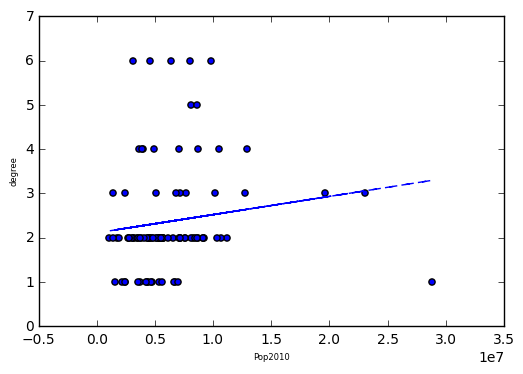

In [61]:
model1 = smf.ols(formula = 'degree ~ Pop2010', data=dfclean).fit()
print model1.summary()

pl.scatter(dfclean.Pop2010, dfclean.degree)
pl.xlabel('Pop2010', fontsize=6)
pl.ylabel('degree', fontsize=6)
plot(dfclean.Pop2010, model1.predict(), '--')

In [71]:
a = pd.DataFrame.from_dict([c1,c2,c3,c4,c5])

# 整理所有高铁经过车站的人口和经纬度

In [73]:
def isint(s):
    try: 
        s = s.replace(',','')
        int(s)
        return True
    except ValueError:
        return False

In [74]:
for i in latlon.index:
    if isint(latlon['pop (2010)'][i]):
        if latlon['pop (2010)'][i] != 0:
            latlon['pop (2010)'][i] = int(latlon['pop (2010)'][i].replace(',',''))
        else:
            latlon = latlon.drop(i)
    else:
        latlon = latlon.drop(i)

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yutao/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
city = []
for i in dic:
    city.append(dic[i].keys())

In [77]:
dic[0].keys()

['Qinhuangdao', 'Shenyang', 'Panjin', 'Huludao', 'Jinzhou', 'Anshan']

In [78]:
import itertools
city2 = list(itertools.chain(*city))

In [79]:
city3 = set(city2)

In [82]:
more = []
for i in city3:
    if i not in latlon.index:
        more.append(i)
        #print i

In [83]:
len(more)

49

In [84]:
morecity = pd.read_csv('othercity.csv')

In [85]:
morecity = morecity.set_index('City')

In [86]:
newlatlon = pd.concat([latlon, morecity])

In [87]:
#newlatlon[140:]

#  New Graph

In [88]:
citylist = newlatlon.index

In [89]:
newlatlon2 = {}
for i in newlatlon.index:
    newlatlon2[i] = (newlatlon['lon'][i],newlatlon['lat'][i])

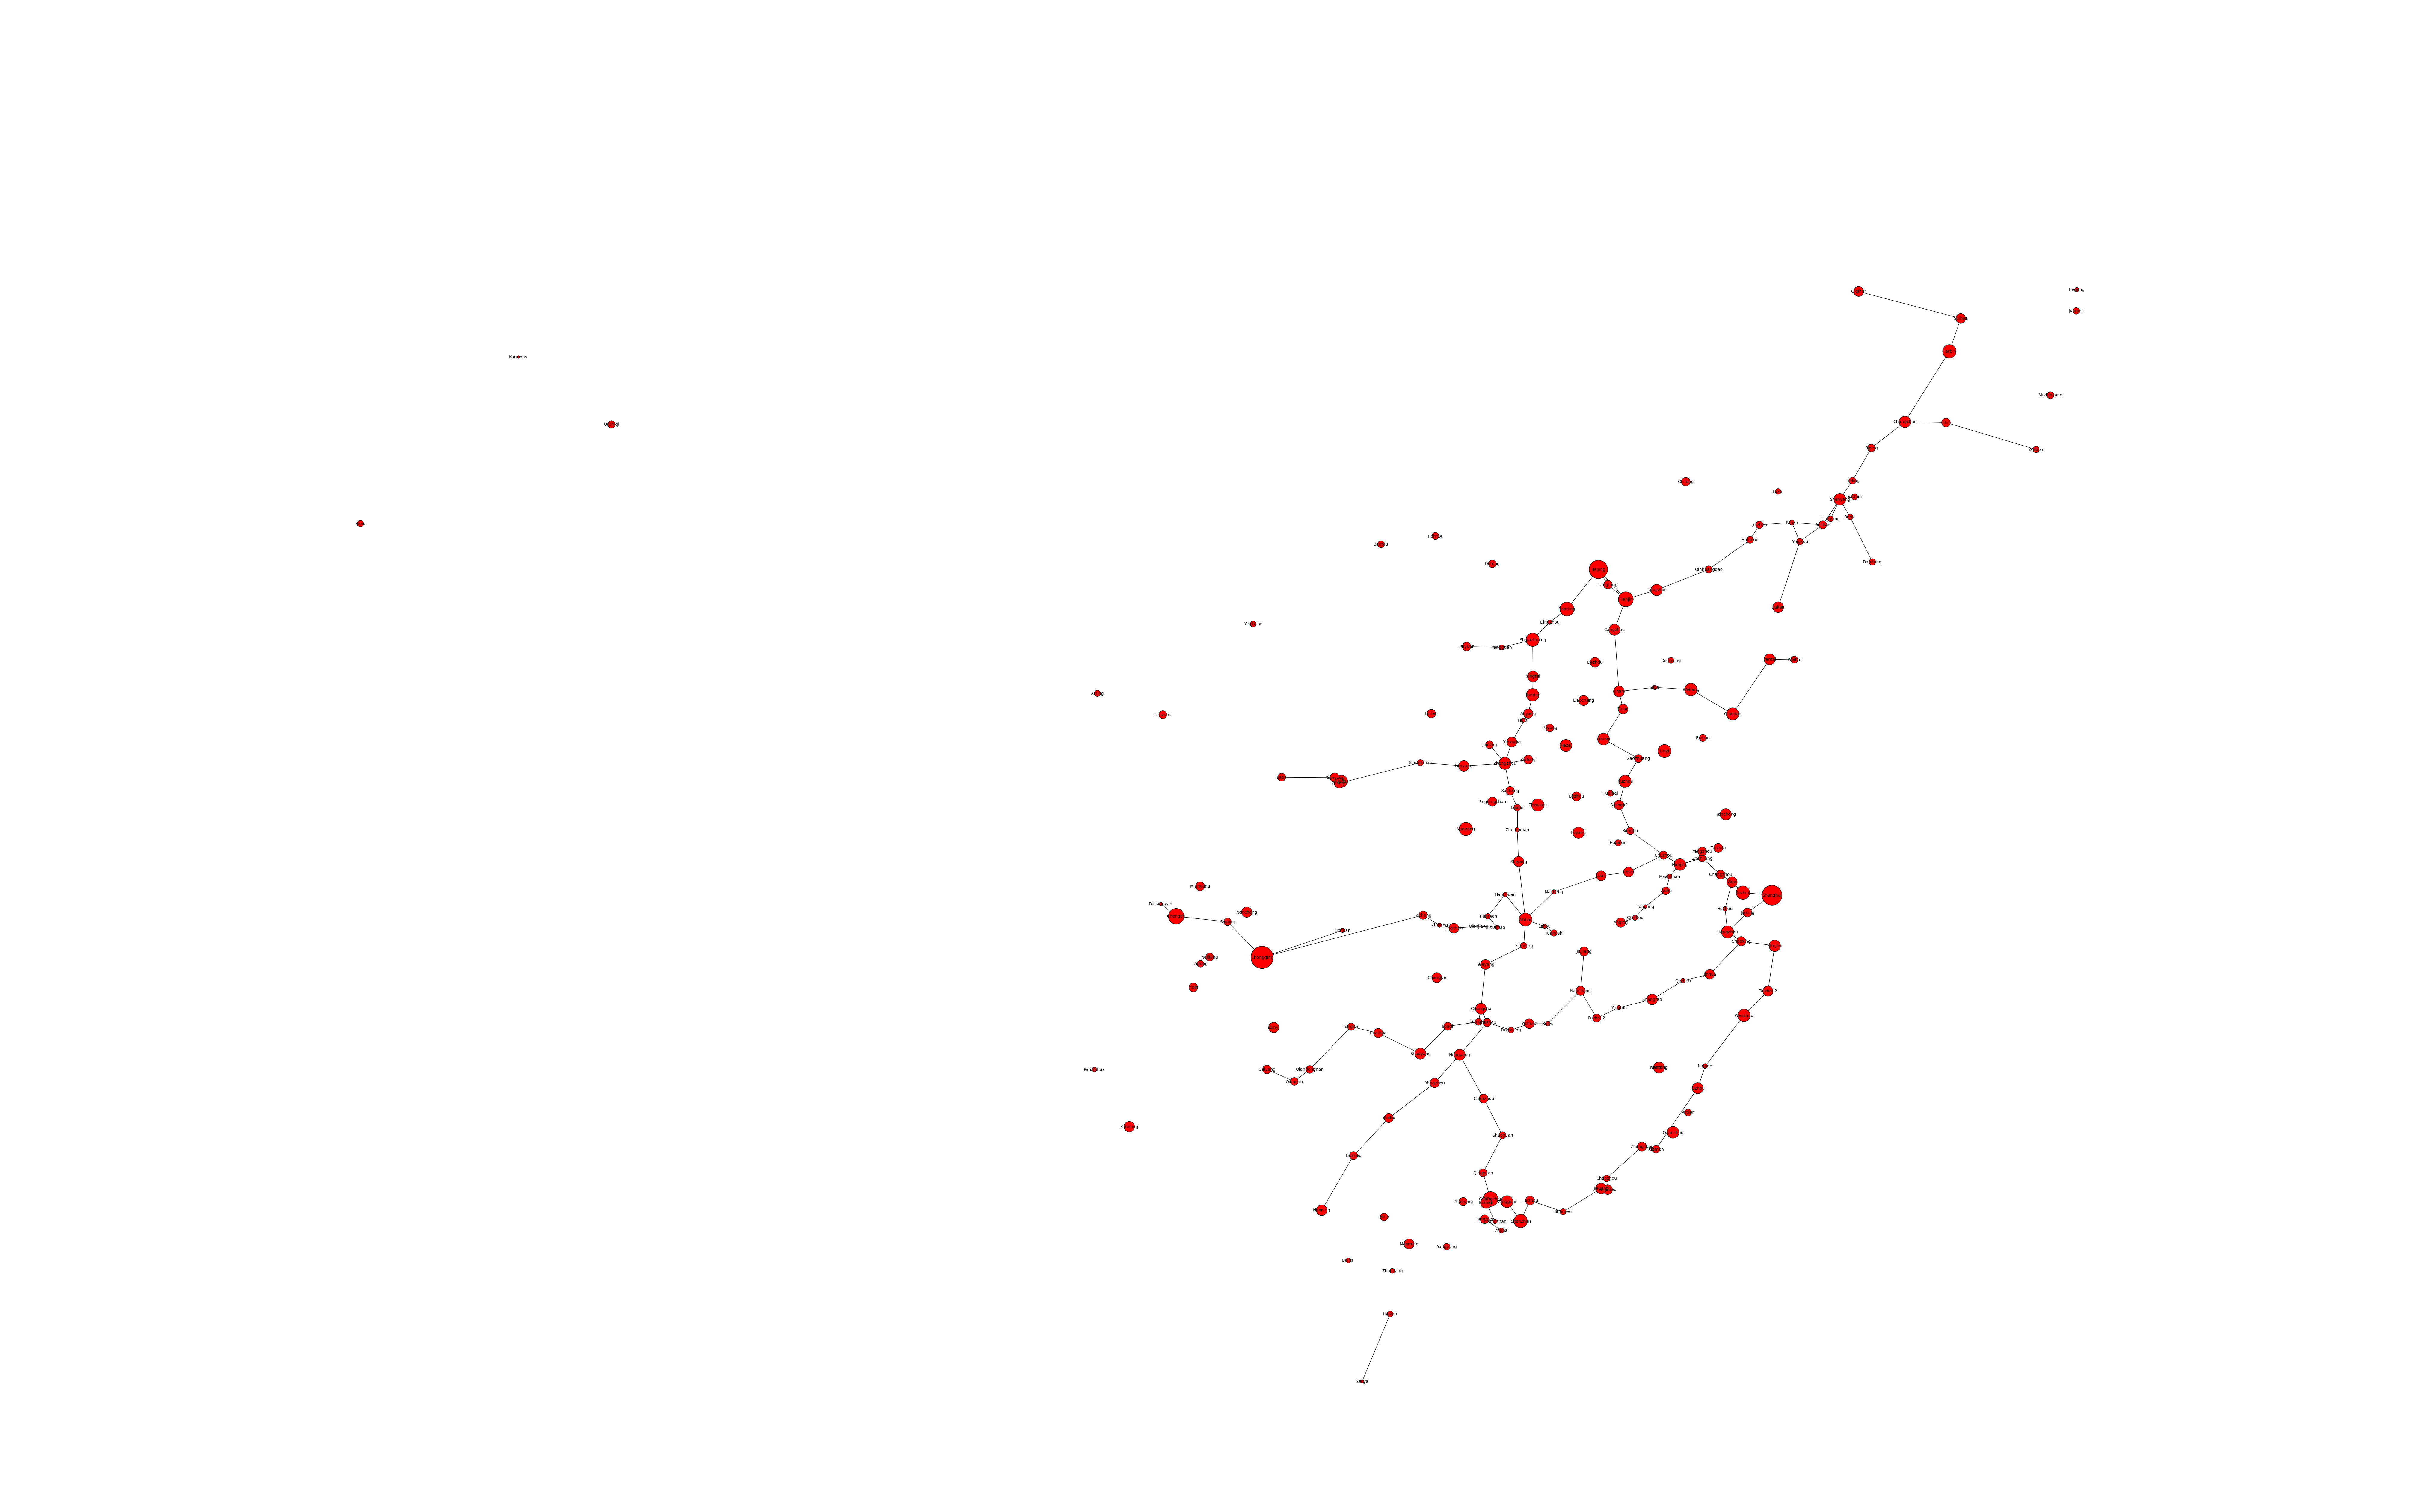

In [90]:
Gcity = nx.MultiGraph()
for i in newlatlon.index:
    Gcity.add_node(i)

popu = []
for i in Gcity.nodes():
    popu.append(newlatlon['pop (2010)'][i]/10000)

for r in dic:
    xx = sorted(dic[r].items(), key=operator.itemgetter(1))
    xxx = []
    for i in range(len(xx)):
        if xx[i][0] in citylist:
            xxx.append(xx[i])
    for i in range(len(xxx)-1):
        if (xxx[i][0] in citylist) & (xxx[i+1][0] in citylist):
            Gcity.add_edge(xxx[i][0],xxx[i+1][0])
            
            
plt.figure(figsize = (80,50))    
nx.draw(Gcity,pos=newlatlon2,with_labels=1,font_size=10,node_size=popu)

# Gravity model

In [91]:
GcityS = nx.Graph(Gcity)

In [92]:
#auxiliary function: geodesic distance on the Earth surface between two lat-long points
from math import sin, cos, sqrt, atan2, radians
def geodist(lon1,lat1,lon2,lat2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)  
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [93]:
#auxiliary function - visualize path on the map
def visualize_path(path):
    plt.figure(figsize = (16,10))
    nx.draw(GcityS,pos=newlatlon2,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')
    x=[newlatlon2[v][0] for v in path]
    y=[newlatlon2[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

In [94]:
nx.set_edge_attributes(GcityS, 'dist', 0)
for e in GcityS.edges():
    GcityS[e[0]][e[1]]['dist']=geodist(newlatlon['lon'][e[0]],newlatlon['lat'][e[0]],newlatlon['lon'][e[1]],newlatlon['lat'][e[1]])

In [95]:
pathNT = nx.shortest_path(GcityS, 'Nanning', 'Qiqihar', 'dist')

In [96]:
nx.shortest_path_length(GcityS, 'Nanning', 'Qiqihar', 'dist')

3861.420658263654

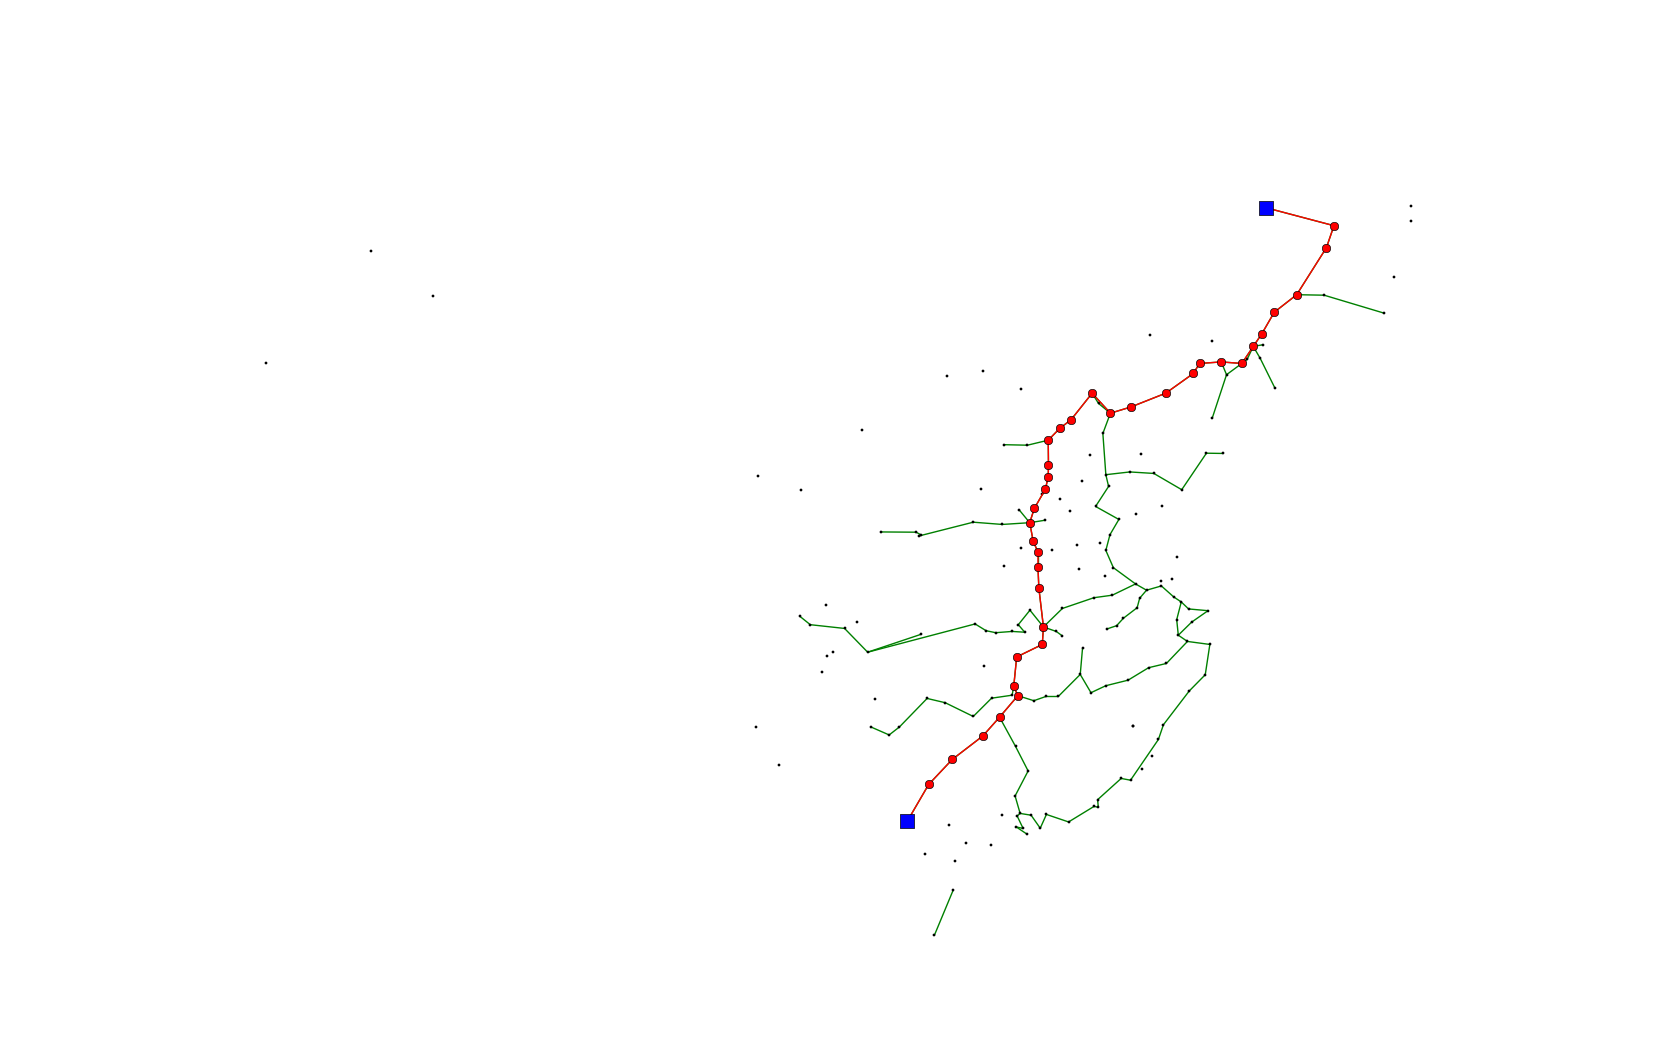

In [97]:
visualize_path(pathNT)

In [98]:
citylist2 = list(citylist)
citylist2.remove('Haikou')
citylist2.remove('Sanya')

for i in citylist:
    if GcityS.degree(i) == 0:
        citylist2.remove(i)

lencity = len(citylist2)
lencity

142

In [99]:
nx.set_edge_attributes(GcityS, 'weight', 0)
for e in GcityS.edges():
    GcityS[e[0]][e[1]]['weight'] = 0

for i in range(lencity):
    for j in range(i+1, lencity):
        path = nx.shortest_path(GcityS, citylist2[i], citylist2[j], 'dist')
        for k in range(len(path)-1):
            w1 = newlatlon['pop (2010)'][path[k]]
            w2 = newlatlon['pop (2010)'][path[k+1]]
            d = nx.shortest_path_length(GcityS, path[k], path[k+1], 'dist')
            GcityS[path[k]][path[k+1]]['weight'] += w1 * w2 / d


In [100]:
for e in GcityS.edges():
    GcityS[e[0]][e[1]]['weight'] /= 1000000000000

In [101]:
GcityS['Shanghai']['Suzhou']['weight']

563.8006633688603

In [102]:
#GcityS.edges()

In [104]:
width = []
for i in GcityS.edges():
    width.append(np.sqrt(GcityS[i[0]][i[1]]['weight'])/5)

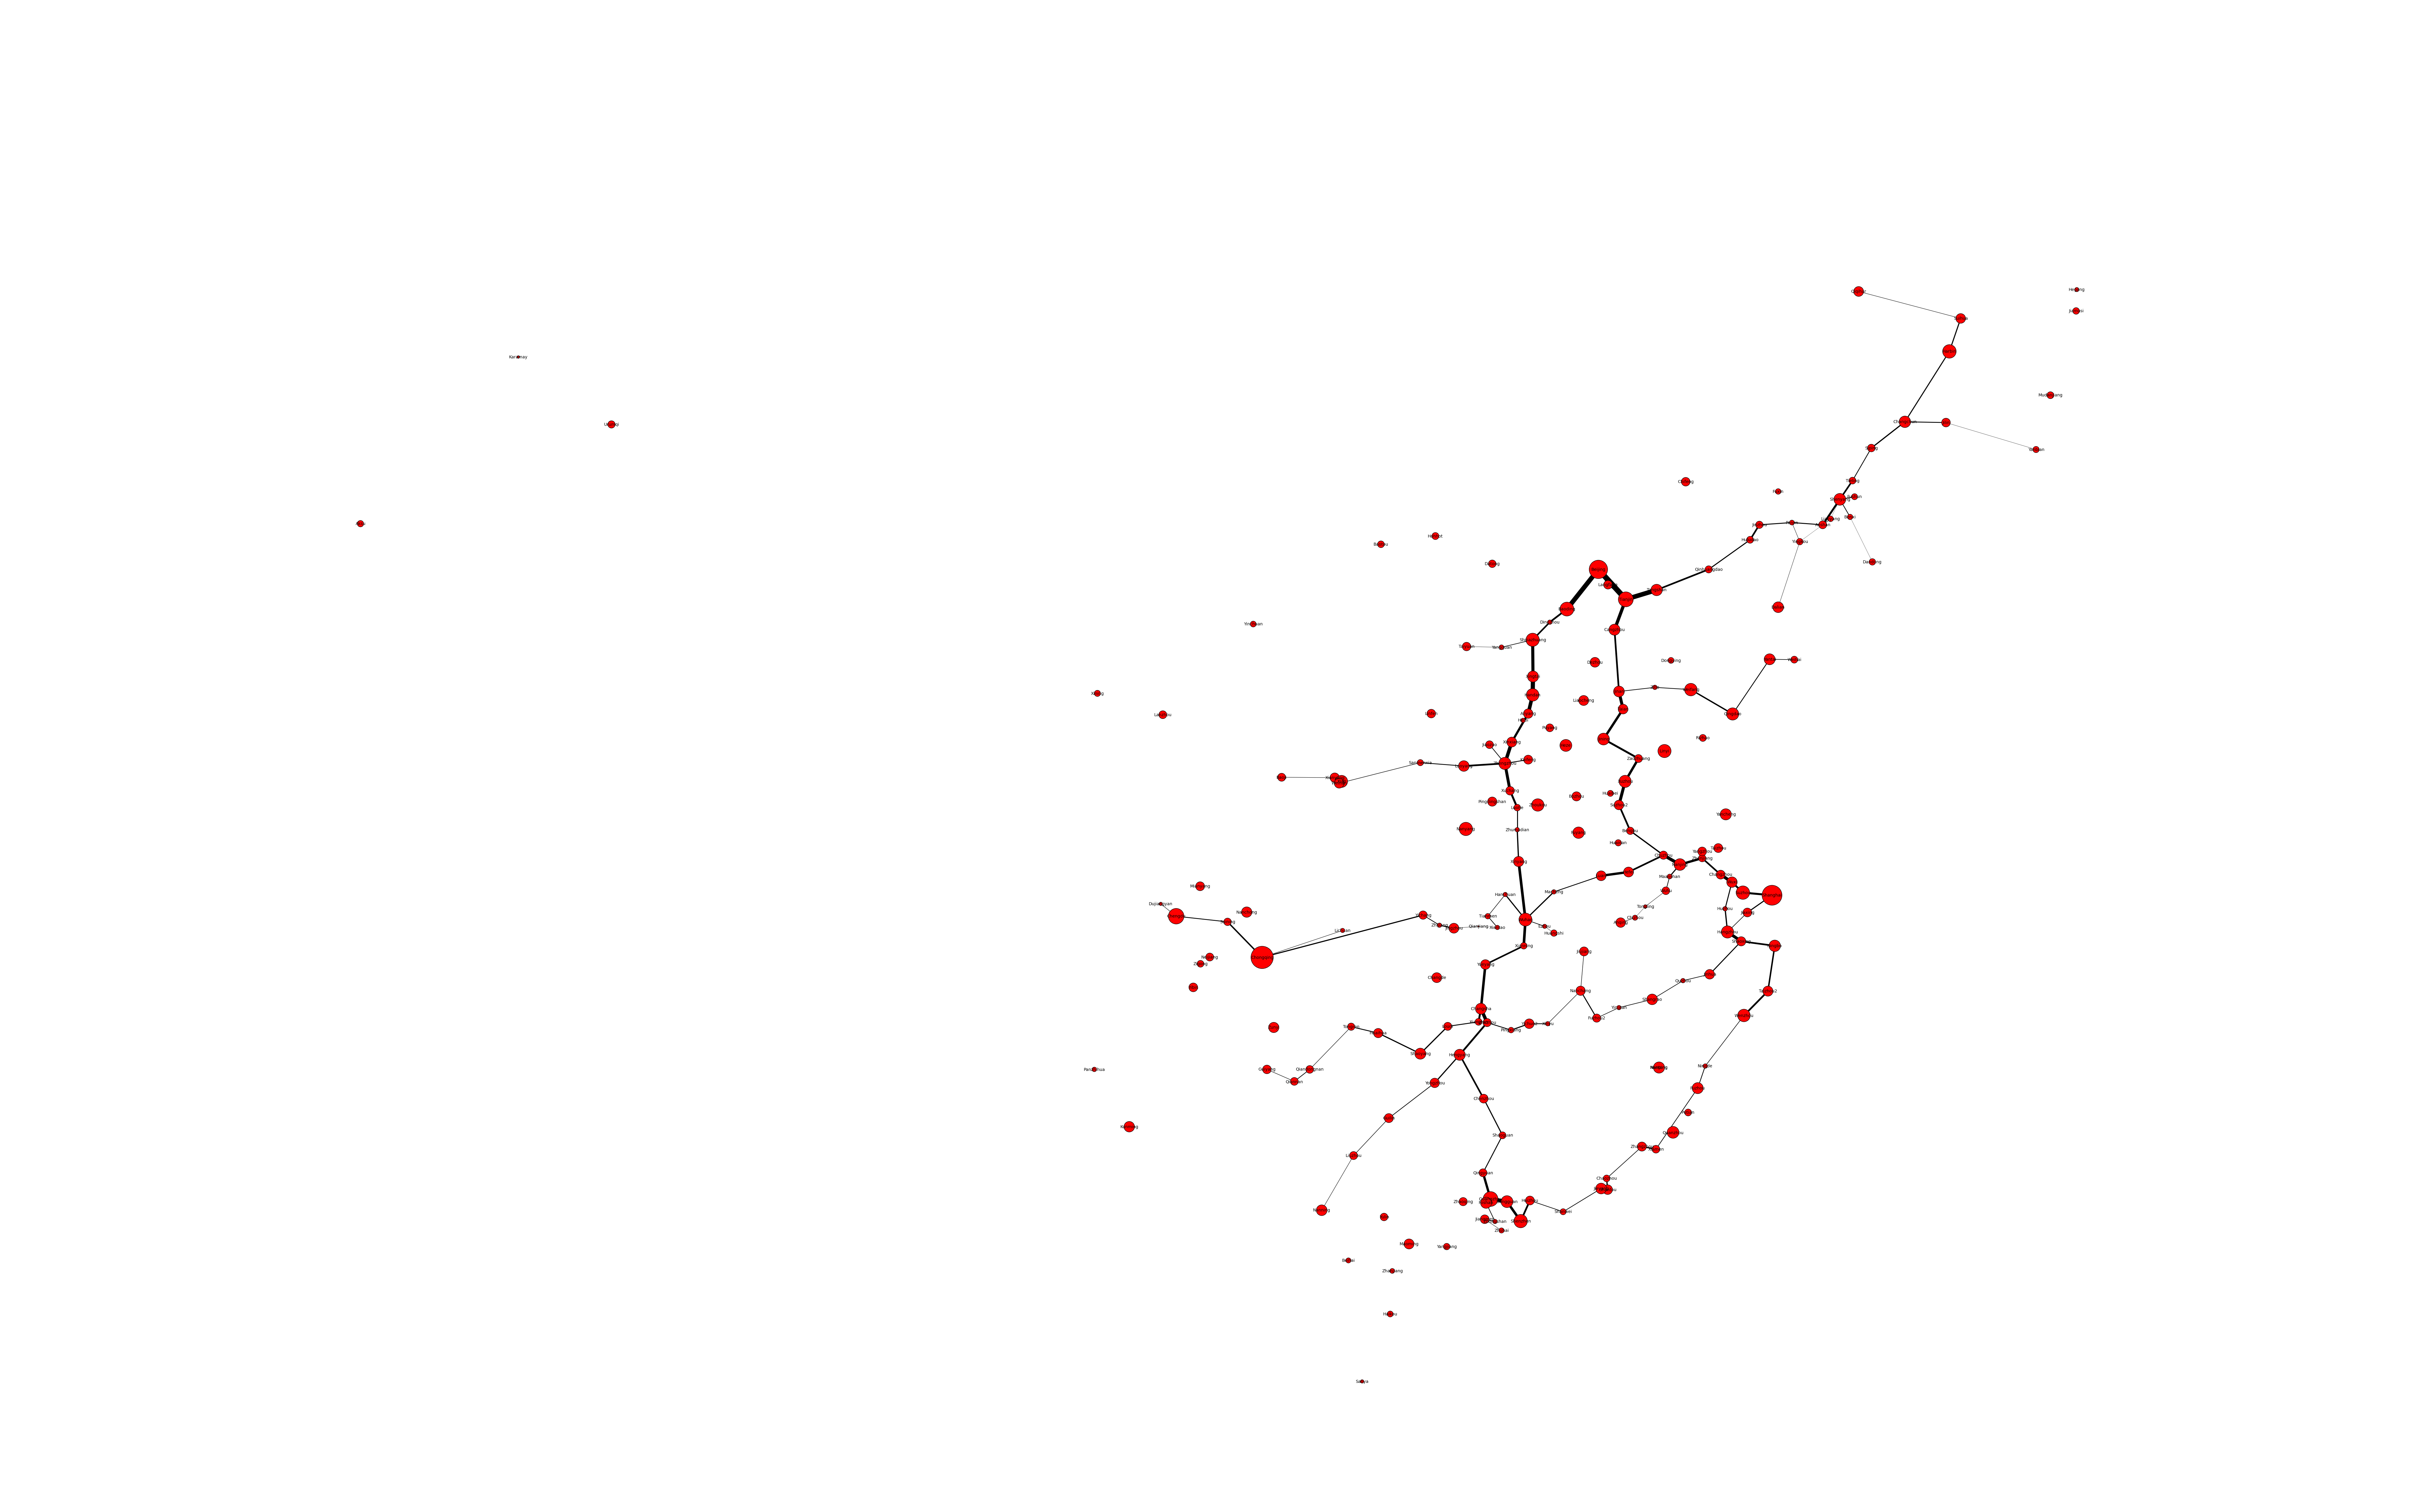

In [105]:
popu = []
for i in GcityS.nodes():
    popu.append(newlatlon['pop (2010)'][i]/10000)

plt.figure(figsize = (80,50))    
nx.draw(GcityS,pos=newlatlon2,width=width,with_labels=1,font_size=10,node_size=popu)

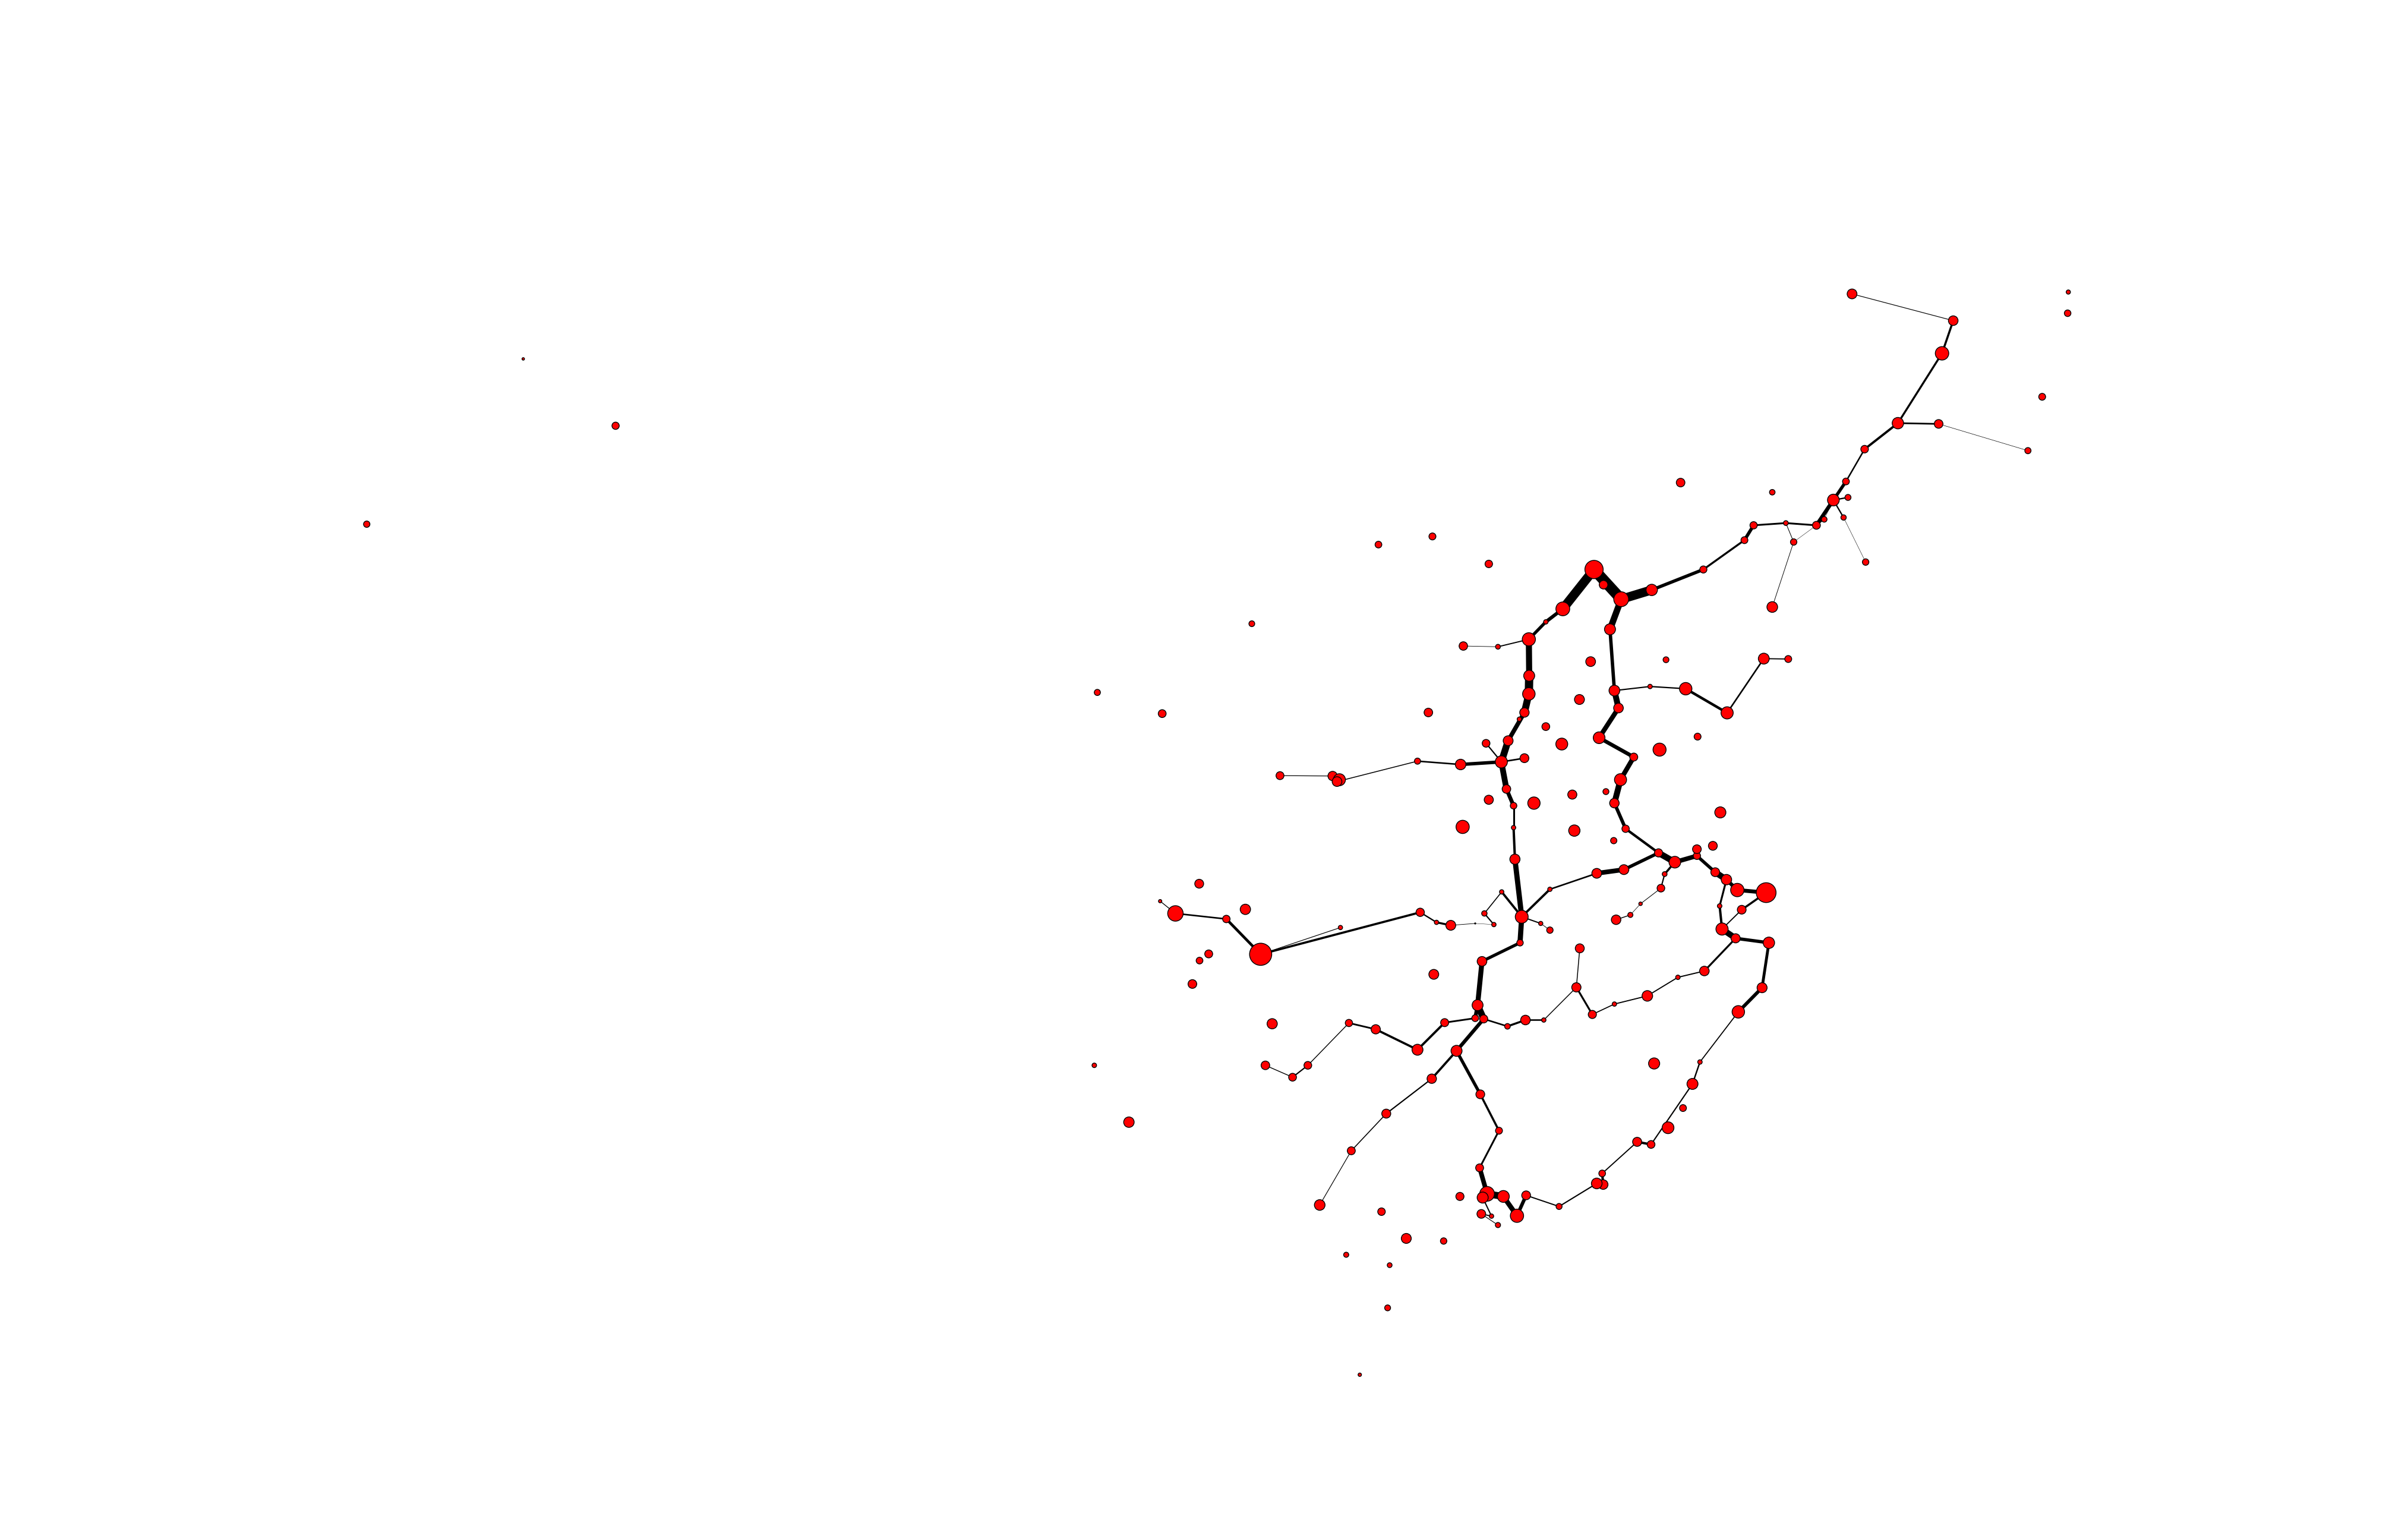

In [106]:
popu = []
for i in GcityS.nodes():
    popu.append(newlatlon['pop (2010)'][i]/40000)
    
plt.figure(figsize = (40,25))    
nx.draw(GcityS,pos=newlatlon2,width=width,with_labels=0,font_size=10,node_size=popu)

In [107]:
for e in GcityS.edges():
    GcityS[e[0]][e[1]]['weight']

In [108]:
ep0 = []
ep1 = []
wei = []
for e in GcityS.edges():
    ep0.append(e[0])
    ep1.append(e[1])
    wei.append(GcityS[e[0]][e[1]]['weight'])

In [109]:
we = pd.DataFrame([ep0,ep1,wei])

In [110]:
we = we.transpose()

In [111]:
we.sort(columns=2,ascending=0).head(10)

/Users/yutao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1,2
127,Tianjin,Beijing,4292.45
69,Baoding,Beijing,3059.01
34,Tangshan,Tianjin,3024.86
79,Guangzhou,Foshan,2909.89
24,Handan,Xingtai,2520.55
99,Xian,Weinan,2291.77
25,Handan,Anyang,1808.27
80,Guangzhou,Dongguan,1744.82
3,Zhengzhou,Xinxiang,1701.1
103,Zhuzhou,Changsha,1597.78


In [112]:
Huning = GcityS.subgraph(['Shanghai', 'Suzhou', 'Wuxi', 'Changzhou','Zhenjiang','Nanjing'])

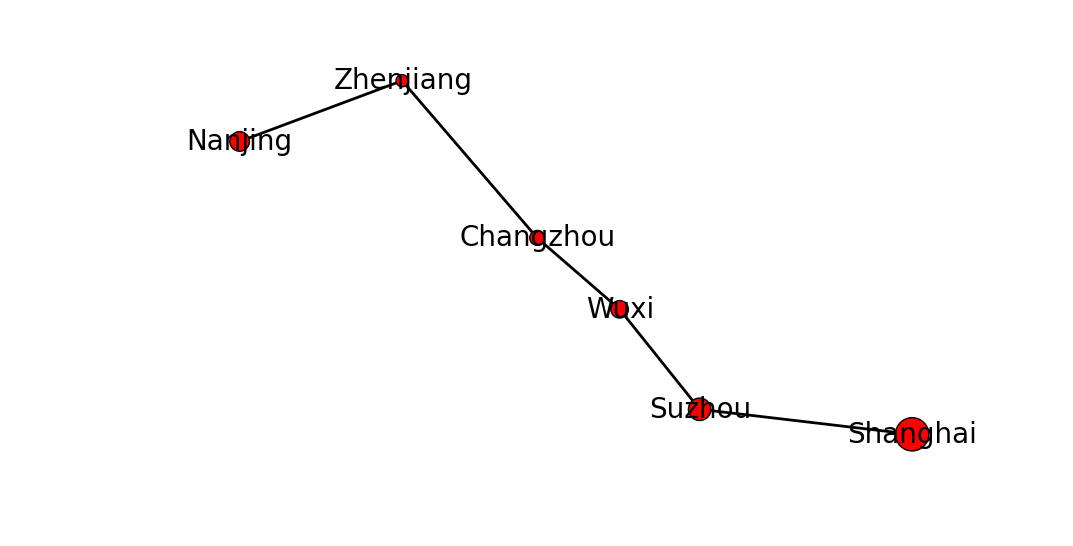

In [113]:
popu2 = []
for i in Huning.nodes():
    popu2.append(newlatlon['pop (2010)'][i]/40000)

Huninglatlon = {}
for i in Huning.nodes():
    Huninglatlon[i] = (newlatlon['lon'][i],newlatlon['lat'][i])

plt.figure(figsize = (10,5))    
nx.draw(Huning,pos=Huninglatlon,width=2,with_labels=1,font_size=20,node_size=popu2)

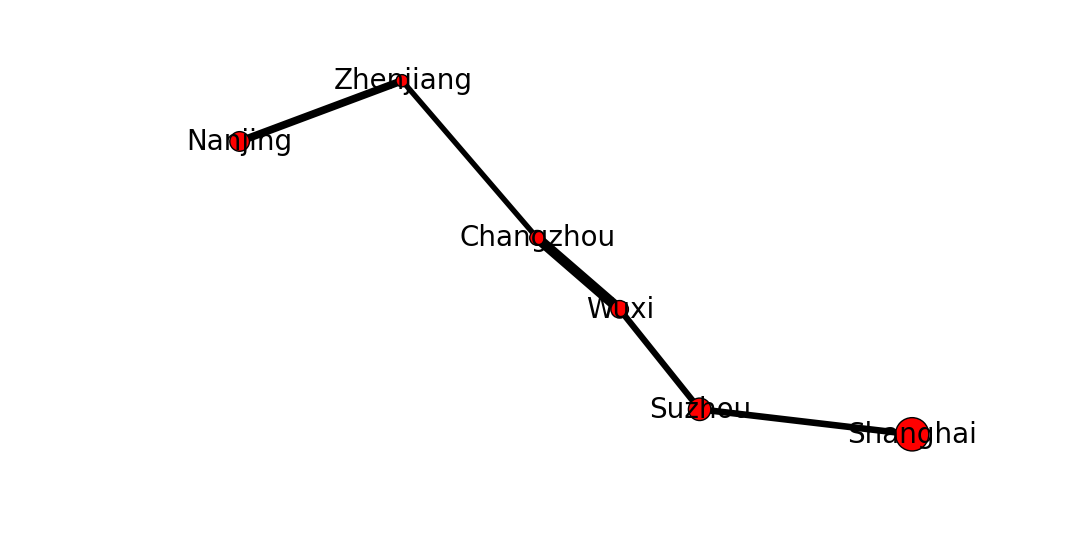

In [114]:
Huningwidth = []
for i in Huning.edges():
    Huningwidth.append(np.sqrt(GcityS[i[0]][i[1]]['weight'])/5)

plt.figure(figsize = (10,5))    
nx.draw(Huning,pos=Huninglatlon,width=Huningwidth,with_labels=1,font_size=20,node_size=popu2)    

In [115]:
GcityS['Nanjing']['Zhenjiang']['weight']

759.2041375074737

In [116]:
ww1 = newlatlon['pop (2010)']['Shanghai']
ww2 = newlatlon['pop (2010)']['Nanjing']
dd = nx.shortest_path_length(GcityS, 'Shanghai', 'Nanjing', 'dist')
print ww1, ww2, dd, ww1*ww2/dd/1000000000000

23019148 8004680 297.751568533 0.618841118185
